# Decision Trees

- It can be used for both regression and classification.
- Decision trees learn a series of explicit rules on feature values that results in a decision that predicts the target value.
- Intuitively, we start by broader questions and then go from there to more specific ones.

<img src="resources/decision_tree_1.png" width = "400">

- We can form these questions into a tree
    - A **node** represents one question
    - At the bottom of the tree there are nodes called **leafs**
    
<img src="resources/decision_tree_2.png" width = "400">

- The goal when building a decision tree is to find the sequence of questions that has the best accuracy at classifying the data in the fewest steps.

<img src="resources/decision_tree_3.png" width = "400">

- Eachdecision splits the data into two branches based on some feature value being above/below a threshold -> **splt-point**
- Intuitively *an informative split** of the data is one that does an excellent job at separating one class from the others
- So for the best split, the results should produce as homogeneous a set of classes as possible
    - One mathematical way to compute the best split is the **information game**

## Process
1. Find the feature that leads to the most informative split
2. Find the feature that leads to the most informative split in the remaining data
3. The process continues recursively ...

- Trees whose lead nodes each have all the same target value are called **pure**
- Trees whose leafs have a mixture of the called **mixed**

## Prediction
To predict the class of a new instance given its feature measurements, we simply start at the root of the decision tree and take the decision at each level based on the appropiate feature measuremente until we get to a leaf node.
- The predicion is then just the majority class of the instances in that lead node.

<img src="resources/decision_tree_4.png" width = "600">

## Problems
- Decision trees keep adding rules until the leaf nodes are pure
    - These trees are usually overly complex and essentially memorized the training data

## Solutions
- When building decision trees we need some additional strategy to prevent it from overfitting.
    - **Pre-pruning**: Stopping the growth early to prevent the tree from becoming really detailed and complex
    - **Post-pruning / pruning**: Build a complete tree with pure leaves and then prune back the tree into a simpler form
- Sklearn only implements pre-pruning
- We can control tree complexity via pruning by:
    - Limitig the maximum depth of the tree of the maximum number of leaf nodes (max_depth, max_leaf_nodes)
    - We can also set a threshold on the minimum number of instances that must be in a node to consider splitting it (min_samples_leaf)

## Feature importance

- They provide an easy to understand summary that give useful insights about individual features in the learning model

<img src="resources/decision_tree_5.png" width = "600">

- That a feature has a low feature importance value doesn't necessarily mean that hte feature is not important for prediciton. It simply means that the particular feature wasn't chosen at an early level of the tree.
    - This could be because the feature may be identical or highly correlated with another informative feature and so it doesn't provide any new additional signal for prediction
- Feature improtance values don't always tell us which specific classes a feature might be especially predictive for
- These values also don't indicate more complex relationships between feature that may influence predictions
- It is common when computing feature importance to use an average over multiple train/test splits.

## Extras
- An advantage of trees (when they are not to complex) is that they are easy to interpret
    - We can easily plot the tree and see the rules being applied for splitting the data

<img src="resources/decision_tree_6.png" width = "600">
- 

<img src="resources/decision_tree_7.png" width = "600">

- Even with the most optimized parameter settings, decision trees will still tend to overfit 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Datasets
from sklearn.datasets import make_regression, make_friedman1, make_classification, make_blobs
from sklearn.datasets import load_breast_cancer
from utils.adspy_shared_utilities import load_crime_dataset

X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150.0, noise = 30, random_state = 0)
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, flip_y = .1, class_sep = .5, random_state = 0)
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset('data/CommViolPredUnnormalizedData.txt')

# Load data
fruits = pd.read_table('data/fruit_data_with_colors.txt')

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

## Decision Trees

In [3]:
from sklearn.datasets import load_iris
from utils.adspy_shared_utilities import plot_decision_tree


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


### Setting max decision tree depth to help avoid overfitting

In [4]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


In [10]:
#plot_decision_tree(clf, iris.feature_names, iris.target_names)

### Feature importances

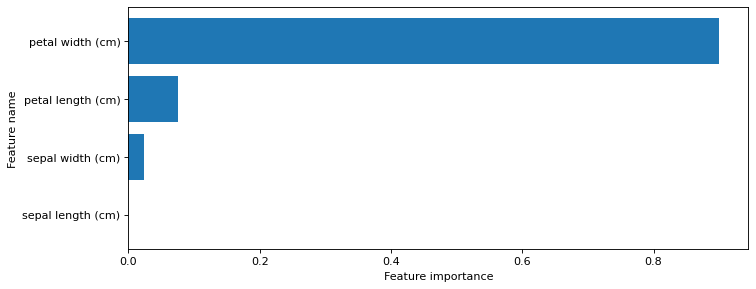

Feature importances: [0.         0.02457904 0.07591724 0.89950372]


In [6]:
from utils.adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

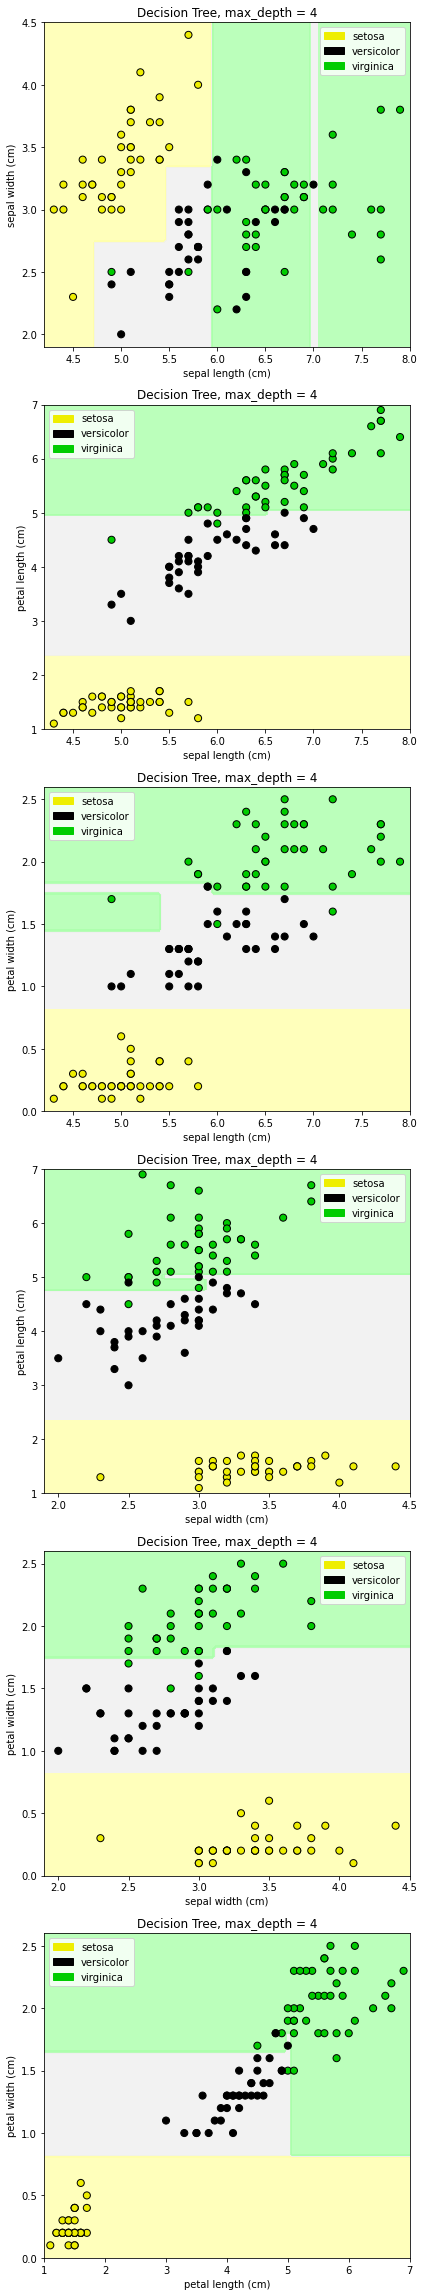

In [7]:
from utils.adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

### Decision Trees on a real-world dataset

In [8]:
from utils.adspy_shared_utilities import plot_decision_tree
from utils.adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


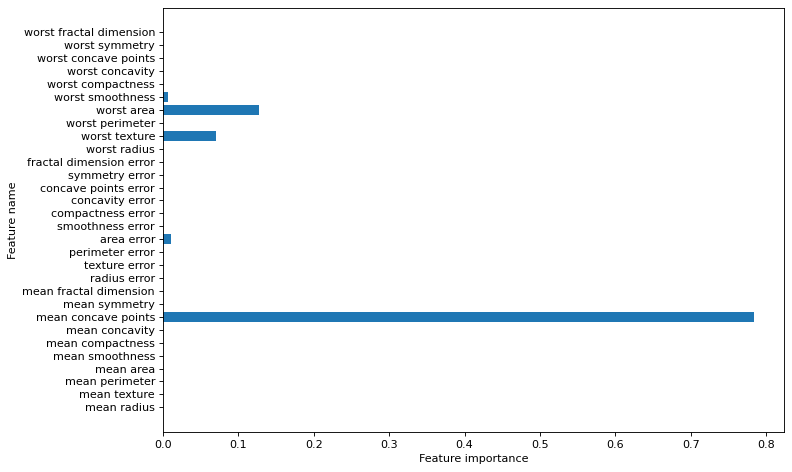

In [9]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()